In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
help(zip)

Help on class zip in module builtins:

class zip(object)
 |  zip(*iterables) --> zip object
 |  
 |  Return a zip object whose .__next__() method returns a tuple where
 |  the i-th element comes from the i-th iterable argument.  The .__next__()
 |  method continues until the shortest iterable in the argument sequence
 |  is exhausted and then it raises StopIteration.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
lat_lngs

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

615

In [8]:
cities

['atuona',
 'rikitea',
 'atar',
 'geraldton',
 'alliston',
 'yellowknife',
 'lompoc',
 'jumla',
 'macamic',
 'kungurtug',
 'ushuaia',
 'plymouth',
 'yulara',
 'bluff',
 'peniche',
 'daru',
 'castro',
 'nova serrana',
 'havoysund',
 'vila velha',
 'busselton',
 'ostrovnoy',
 'port alfred',
 'talnakh',
 'illoqqortoormiut',
 'punta arenas',
 'karlskrona',
 'las margaritas',
 'novikovo',
 'tiksi',
 'kapaa',
 'pacific grove',
 'inhambane',
 'sahuaripa',
 'kaeo',
 'hobart',
 'ambodifototra',
 'chuy',
 'hilo',
 'sur',
 'hihifo',
 'duluth',
 'new norfolk',
 'komsomolskiy',
 'taolanaro',
 'naze',
 'kodiak',
 'albany',
 'saint-francois',
 'cape town',
 'balkanabat',
 'rudbar',
 'vostok',
 'mataura',
 'luderitz',
 'nizhneyansk',
 'georgetown',
 'lata',
 'khatanga',
 'vaini',
 'thompson',
 'mahebourg',
 'umm kaddadah',
 'saldanha',
 'leningradskiy',
 'faanui',
 'mar del plata',
 'tasiilaq',
 'barrow',
 'sangar',
 'kamiiso',
 'hermanus',
 'hithadhoo',
 'waingapu',
 'saint-philippe',
 'kijaba',
 'co

In [9]:
import requests
from config import key

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + key

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [13]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | atar
Processing Record 4 of Set 1 | geraldton
Processing Record 5 of Set 1 | alliston
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | lompoc
Processing Record 8 of Set 1 | jumla
Processing Record 9 of Set 1 | macamic
Processing Record 10 of Set 1 | kungurtug
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | plymouth
Processing Record 13 of Set 1 | yulara
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | peniche
Processing Record 16 of Set 1 | daru
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | nova serrana
Processing Record 19 of Set 1 | havoysund
Processing Record 20 of Set 1 | vila velha
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | ostrovnoy
Processing Record 23 of Set 1 | port alfred
Processing Record 24 of Set 1 | talnakh
Processing Record 25 of Set 1 | ill

Processing Record 39 of Set 4 | mabaruma
Processing Record 40 of Set 4 | port pirie
Processing Record 41 of Set 4 | kununurra
Processing Record 42 of Set 4 | lujiang
Processing Record 43 of Set 4 | yurla
Processing Record 44 of Set 4 | alofi
Processing Record 45 of Set 4 | chokurdakh
Processing Record 46 of Set 4 | ilam
Processing Record 47 of Set 4 | warqla
City not found. Skipping...
Processing Record 48 of Set 4 | lagoa
Processing Record 49 of Set 4 | ushtobe
Processing Record 50 of Set 4 | norman wells
Processing Record 1 of Set 5 | upernavik
Processing Record 2 of Set 5 | verkh-usugli
Processing Record 3 of Set 5 | kurumkan
Processing Record 4 of Set 5 | shimoda
Processing Record 5 of Set 5 | aginskoye
Processing Record 6 of Set 5 | barreirinhas
Processing Record 7 of Set 5 | cagayan de oro
Processing Record 8 of Set 5 | mogadishu
Processing Record 9 of Set 5 | pinega
Processing Record 10 of Set 5 | donskoye
Processing Record 11 of Set 5 | tougue
Processing Record 12 of Set 5 | sh

City not found. Skipping...
Processing Record 31 of Set 8 | sisimiut
Processing Record 32 of Set 8 | souillac
Processing Record 33 of Set 8 | inta
Processing Record 34 of Set 8 | makakilo city
Processing Record 35 of Set 8 | eyl
Processing Record 36 of Set 8 | dekoa
City not found. Skipping...
Processing Record 37 of Set 8 | mount isa
Processing Record 38 of Set 8 | novobiryusinskiy
Processing Record 39 of Set 8 | nara
Processing Record 40 of Set 8 | porbandar
Processing Record 41 of Set 8 | grudziadz
Processing Record 42 of Set 8 | kemijarvi
Processing Record 43 of Set 8 | san carlos de bariloche
Processing Record 44 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 45 of Set 8 | mindelo
Processing Record 46 of Set 8 | badarwas
Processing Record 47 of Set 8 | brae
Processing Record 48 of Set 8 | shellbrook
Processing Record 49 of Set 8 | sao filipe
Processing Record 50 of Set 8 | zemetchino
Processing Record 1 of Set 9 | rawson
Processing Record 2 of Set 9 | sitka
Pr

Processing Record 14 of Set 12 | armidale
Processing Record 15 of Set 12 | ribeirao das neves
Processing Record 16 of Set 12 | jiayuguan
Processing Record 17 of Set 12 | sikonge
Processing Record 18 of Set 12 | vagur
Processing Record 19 of Set 12 | gubkinskiy
Processing Record 20 of Set 12 | richards bay
Processing Record 21 of Set 12 | chute-aux-outardes
Processing Record 22 of Set 12 | bage
Processing Record 23 of Set 12 | mentok
City not found. Skipping...
Processing Record 24 of Set 12 | moiyabana
City not found. Skipping...
Processing Record 25 of Set 12 | phan thiet
Processing Record 26 of Set 12 | karratha
Processing Record 27 of Set 12 | puerto escondido
Processing Record 28 of Set 12 | carupano
Processing Record 29 of Set 12 | carutapera
Processing Record 30 of Set 12 | sao francisco
Processing Record 31 of Set 12 | gasan
Processing Record 32 of Set 12 | sao felix do xingu
Processing Record 33 of Set 12 | ojinaga
Processing Record 34 of Set 12 | paucartambo
City not found. Sk

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,78.39,79,12,17.22,PF,2021-11-25 23:36:37
1,Rikitea,-23.1203,-134.9692,76.87,73,9,10.40,PF,2021-11-25 23:36:38
2,Atar,20.5169,-13.0499,80.85,26,94,4.25,MR,2021-11-25 23:36:38
3,Geraldton,-28.7667,114.6000,86.41,14,0,18.41,AU,2021-11-25 23:36:39
4,Alliston,44.1501,-79.8663,43.68,94,90,1.01,CA,2021-11-25 23:33:57
5,Yellowknife,62.4560,-114.3525,11.41,91,90,13.80,CA,2021-11-25 23:36:39
6,Lompoc,34.6391,-120.4579,75.34,55,1,11.50,US,2021-11-25 23:36:40
7,Jumla,29.2747,82.1838,36.81,50,0,4.32,NP,2021-11-25 23:36:40
8,Macamic,48.7502,-78.9996,26.83,95,100,12.71,CA,2021-11-25 23:36:41
9,Kungurtug,50.5994,97.5228,20.53,82,90,2.71,RU,2021-11-25 23:36:41


In [15]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2021-11-25 23:36:37,-9.8000,-139.0333,78.39,79,12,17.22
1,Rikitea,PF,2021-11-25 23:36:38,-23.1203,-134.9692,76.87,73,9,10.40
2,Atar,MR,2021-11-25 23:36:38,20.5169,-13.0499,80.85,26,94,4.25
3,Geraldton,AU,2021-11-25 23:36:39,-28.7667,114.6000,86.41,14,0,18.41
4,Alliston,CA,2021-11-25 23:33:57,44.1501,-79.8663,43.68,94,90,1.01
5,Yellowknife,CA,2021-11-25 23:36:39,62.4560,-114.3525,11.41,91,90,13.80
6,Lompoc,US,2021-11-25 23:36:40,34.6391,-120.4579,75.34,55,1,11.50
7,Jumla,NP,2021-11-25 23:36:40,29.2747,82.1838,36.81,50,0,4.32
8,Macamic,CA,2021-11-25 23:36:41,48.7502,-78.9996,26.83,95,100,12.71
9,Kungurtug,RU,2021-11-25 23:36:41,50.5994,97.5228,20.53,82,90,2.71


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

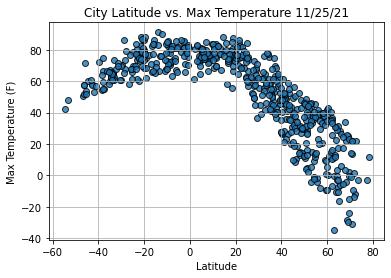

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


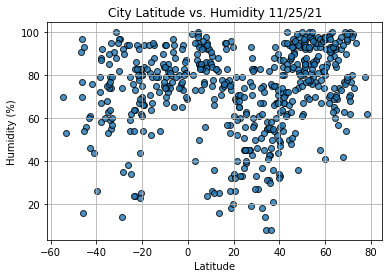

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

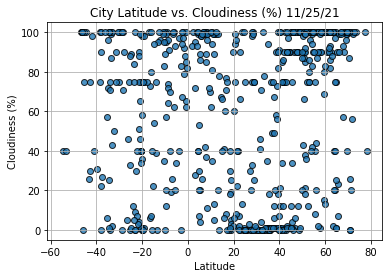

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


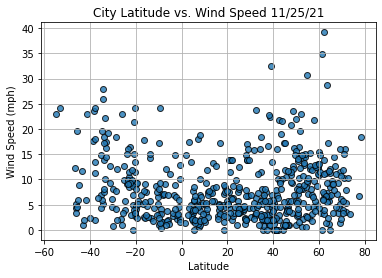

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                        Bluff
Country                        NZ
Date          2021-11-25 23:36:43
Lat                         -46.6
Lng                      168.3333
Max Temp                    50.41
Humidity                       91
Cloudiness                    100
Wind Speed                   12.3
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
555     True
556     True
557     True
558     True
559     True
Name: Lat, Length: 560, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Atar,MR,2021-11-25 23:36:38,20.5169,-13.0499,80.85,26,94,4.25
4,Alliston,CA,2021-11-25 23:33:57,44.1501,-79.8663,43.68,94,90,1.01
5,Yellowknife,CA,2021-11-25 23:36:39,62.4560,-114.3525,11.41,91,90,13.80
6,Lompoc,US,2021-11-25 23:36:40,34.6391,-120.4579,75.34,55,1,11.50
7,Jumla,NP,2021-11-25 23:36:40,29.2747,82.1838,36.81,50,0,4.32


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

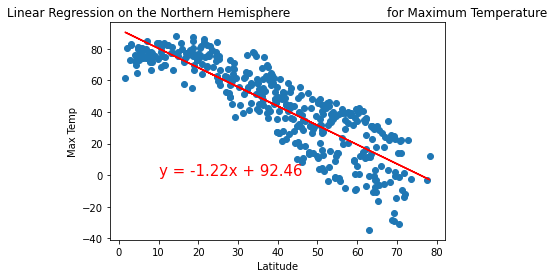

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,0))

In [39]:
linregress(x_values, y_values)

LinregressResult(slope=-1.2178350809093377, intercept=92.45588585239008, rvalue=-0.8664623859307781, pvalue=1.2669062265470196e-120, stderr=0.03539597812224235, intercept_stderr=1.5554360459612306)

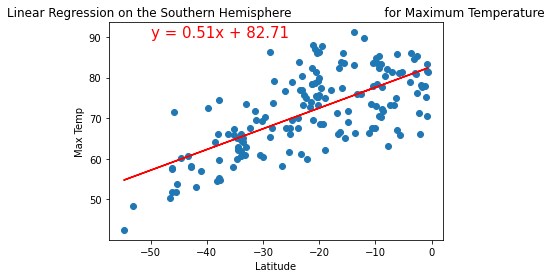

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-50,90))

In [43]:
linregress(x_values, y_values)

LinregressResult(slope=0.5104833333371694, intercept=82.70975250419417, rvalue=0.6862726893275723, pvalue=2.626671545727378e-24, stderr=0.042377088515300705, intercept_stderr=1.0697954153789742)

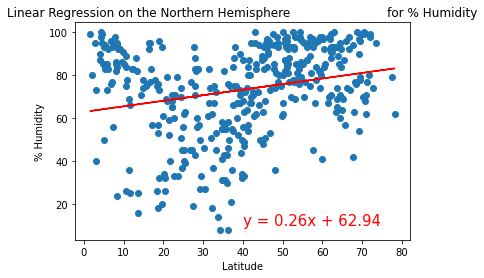

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [37]:
linregress(x_values, y_values)

LinregressResult(slope=0.25870795258823015, intercept=62.93698794742155, rvalue=0.2422185147344468, pvalue=1.107701421095031e-06, stderr=0.052272968178265364, intercept_stderr=2.29707620038238)

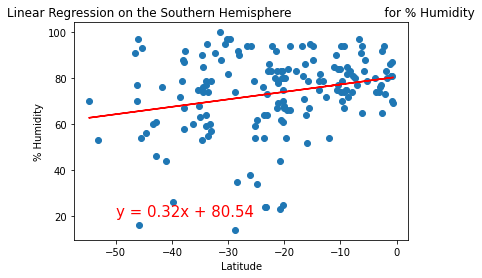

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Humidity', '% Humidity',(-50,20))

In [35]:
linregress(x_values, y_values)

LinregressResult(slope=0.3240992214680022, intercept=80.53813370818379, rvalue=0.2437146317850238, pvalue=0.0016078675976585722, stderr=0.10101963686520231, intercept_stderr=2.550206920011087)

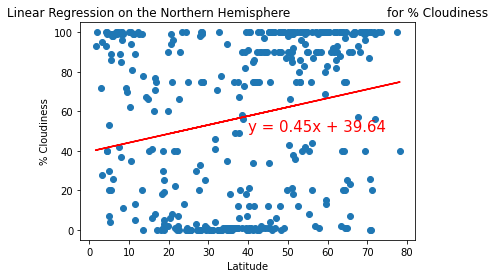

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,50))

In [54]:
linregress(x_values, y_values)

LinregressResult(slope=0.44997699378135075, intercept=39.63560985449995, rvalue=0.2150242845364882, pvalue=1.6288297886788052e-05, stderr=0.1030925099236838, intercept_stderr=4.5302832273802744)

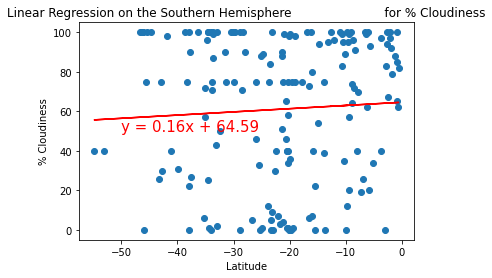

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(-50,50))

In [56]:
linregress(x_values, y_values)

LinregressResult(slope=0.16275671040967196, intercept=64.59043654653624, rvalue=0.057783719134407524, pvalue=0.46098928794689353, stderr=0.22024869894158428, intercept_stderr=5.560104684535306)

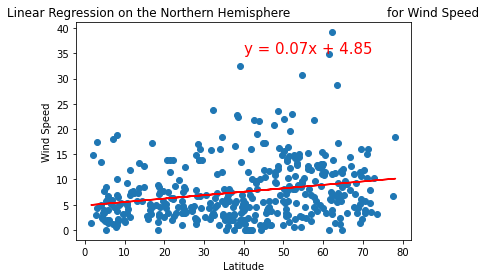

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [59]:
linregress(x_values, y_values)

LinregressResult(slope=0.06796249545234216, intercept=4.847739389861262, rvalue=0.22388251856855718, pvalue=7.034895196831255e-06, stderr=0.014924041791452408, intercept_stderr=0.6558200616377349)

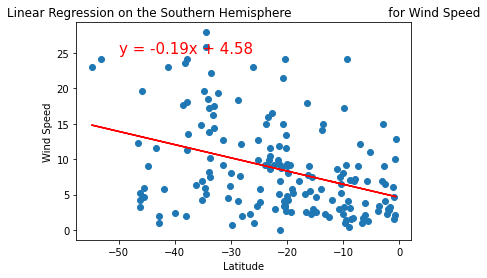

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))

In [63]:
linregress(x_values, y_values)

LinregressResult(slope=-0.18663850817054534, intercept=4.58166126671211, rvalue=-0.3756942915741223, pvalue=6.606864462125146e-07, stderr=0.03606056080687687, intercept_stderr=0.910336787607832)